# INM 702 Task 1
## Faisal Mungi
## faisal.mungi@city.ac.uk

In [33]:
# method for visualizing path
def plot_path(path):
  a,b = zip(*path)
  plt.plot(b,a)
  plt.scatter(b,a, color = "red")
  plt.gca().invert_yaxis()
  plt.xticks(np.arange(len(grid[0])))
  plt.grid()
  plt.show()

In [34]:
import pandas as pd

# dataframe to store results

results = pd.DataFrame(columns = ['Case','Heuristic M1', 'Heuristic M2','Dijkstra M1', 'Dijkstra M2'])



In [35]:
#import random
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
rng = default_rng()



class GenerateGrid:
    def makegrid(self, mode, x1,y1):
        np.random.seed(66)#44
        x = np.random.randint(2,15)
        y = np.random.randint(2,15)

        if mode == 9:
          x = x1
          y = y1
          val = np.random.randint(2,15, size = x*y)
        if mode == 1:
          np.random.seed(77)#88
          val = np.random.randint(2,15, size = x*y)
        elif mode == 2:
          #using uniform distribution
          ub = np.random.randint(10, 16)
          lb = np.random.randint(1, 5)
          val = np.random.uniform(lb, ub, size = x*y)
          val = np.round(val,1)
        elif mode == 3:
          #using Poisson distribution
          num = np.random.randint(5,15)
          val = np.random.poisson(lam = num, size = x*y)
        elif mode == 4:
          #using binomial distribution
          num = np.random.randint(5,10)
          prob = np.random.rand()
          val = np.random.binomial(n = num, p = prob, size = x*y)
        
        val = np.reshape(val,(x,y))
        
        return val
    
    def printgrid(self, grid):
        g1 = " _______" * len(grid[0])
        for i in range(len(grid)):
            print(g1)
            for j in range(len(grid[0])):
                print("|  {}\t".format(grid[i][j]),end = '')
            print("|")
        print(g1)

        
        
class Navigate:
    def simpleappr(self,grid, mode):
        x = len(grid)-1
        y = len(grid[0])-1
        path = []
        flag = True
        i=0
        j=0
        #curr_pos = (i,j)
        cost = 0
        path.append((i,j))
        # only selecting from moving right or down where possible
        while (flag):

            if i < x:
              if mode:
                down1 = grid[i+1][j]
              else:
                down1 = abs(grid[i+1][j] - grid[i][j])

            else: down1 = 10000
            if j < y:
              if mode:
                right1 = grid[i][j+1]
              else:
                right1 = abs(grid[i][j+1] - grid[i][j])
            else: right1 = 10000

            if down1 < right1:
              i = i+1
              if not mode:
                cost += down1

            else: 
              j = j+1
              if not mode:
                cost += right1
            path.append((i,j))
            if mode:
              cost += grid[i][j]
            if (i==x and j == y):
                flag = False
        
        return path, cost
       
        
gengrid = GenerateGrid()
grid = gengrid.makegrid(1,0,0)

print("Number of Rows -> ",len(grid))
print("Number of Columns -> ",len(grid[0]))

print("Generating random grid\n\n",grid)




Number of Rows ->  6
Number of Columns ->  14
Generating random grid

 [[ 9  6  6 13  7 10  2 11  9  7 14  5  2 13]
 [ 8  6  8  6  7 12  9  5 13  3 13  3 11  8]
 [ 6  7 10 14  3 10  3 12  8  5  6  5 11 14]
 [ 2 14 10 11  7 13 14  5  4  6  6  7  8 14]
 [ 7 12  3  4 11  6 14  5 11 10  4  2 10  9]
 [ 9  7 12  5  6 13 13  4  8  9  8  4 13 13]]


In [36]:
#Visualizing Grid
print("\nVisualizing Grid\n")
gengrid.printgrid(grid)



Visualizing Grid

 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  9	|  6	|  6	|  13	|  7	|  10	|  2	|  11	|  9	|  7	|  14	|  5	|  2	|  13	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  8	|  6	|  8	|  6	|  7	|  12	|  9	|  5	|  13	|  3	|  13	|  3	|  11	|  8	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  6	|  7	|  10	|  14	|  3	|  10	|  3	|  12	|  8	|  5	|  6	|  5	|  11	|  14	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  2	|  14	|  10	|  11	|  7	|  13	|  14	|  5	|  4	|  6	|  6	|  7	|  8	|  14	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  7	|  12	|  3	|  4	|  11	|  6	|  14	|  5	|  11	|  10	|  4	|  2	|  10	|  9	|
 _______ _______ _______ ____



HEURSISTIC APPROACH 


MODE 1
Path taken ->  [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4), (4, 5), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  145
Visualizing Path taken 


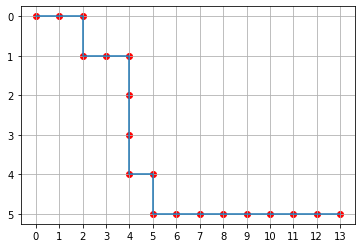

In [37]:
#Heuristic Mode1
nav = Navigate()
path, cost1 = nav.simpleappr(grid,True)

print("\n\nHEURSISTIC APPROACH \n\n\nMODE 1\nPath taken -> ",path)
print("\nThe cost to reach goal is -> ",cost1)
print("Visualizing Path taken ")
plot_path(path)



HEURISTIC APPROACH


MODE 2
Path taken ->  [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (4, 4), (4, 5), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  56
Visualizing Path taken 


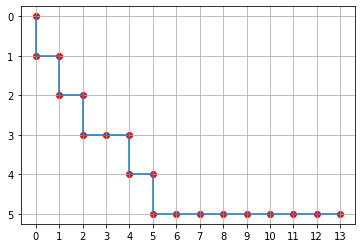

In [38]:
#Heuristic Mode2

path, cost2 = nav.simpleappr(grid,False)

print("\nHEURISTIC APPROACH\n\n\nMODE 2\nPath taken -> ",path)
print("\nThe cost to reach goal is -> ",cost2)
print("Visualizing Path taken ")
plot_path(path)

In [39]:
import heapq

class Dijkstra:
    
        
    
    def shortpath(self, grid, mode):
        x = len(grid)-1
        y = len(grid[0])-1
        #print("val of y ",y)
        visited = np.zeros((x+1,y+1))
        check = np.ones((x+1,y+1))
        
        dist = np.zeros((x+1,y+1))
        visited[0][0] = 1
        #print(visited)
        dist[0][0] = 0
        prevloc = {}
        
        i = j = 0
        path = []
        hq = []
        #print(type(i))
        #checkadj(grid,i,j)
        #if (i<x):
        flag = True
        # mode is to select the game mode 1 or 2
        while (flag):
            if(i<x): # checking for cell in next row
                if (visited[i+1][j] == 0): # if the cell hasnt been visited earlier
                    
                    visited[i+1][j] = 1
                    if(mode):
                      dist[i+1][j] = dist[i][j] + grid[i+1][j]
                    #                   dist        cell pos
                    else: 
                      dist[i+1][j] = dist[i][j] + abs(grid[i][j] - grid[i+1][j])
                    
                    heapq.heappush(hq,(dist[i+1][j],(i+1,j) ) )
                    #           next loc   prev cell (coming from)
                    prevloc[(i+1,j)] = [i,j]
                else: # if the cell was visited earlier. check previous distance from start and current distance, if better then update
                    #a,b = prevloc[(i+1,j)]
                    #dis1 = dist[a][b]
                    if(mode):
                      ds = dist[i][j] + grid[i+1][j]
                    else:
                      ds = dist[i][j] + abs(grid[i][j] - grid[i+1][j])
                    if ds < dist[i+1][j]:
                        dist[i+1][j] = ds
                        prevloc[(i+1,j)] = [i,j]
            
            if (i>0):
                if (visited[i-1][j]!=1):
                    
                    visited[i-1][j] = 1
                    if(mode):
                      dist[i-1][j] = dist[i][j] + grid[i-1][j]
                    #                   dist        cell pos
                    else:
                      dist[i-1][j] = dist[i][j] + abs(grid[i][j] - grid[i-1][j])
                    heapq.heappush(hq,(dist[i-1][j],(i-1,j) ) )
                    #        next loc   prev cell (coming from)
                    prevloc[(i-1,j)] = [i,j]
                else:
                    #a,b = prevloc[(i+1,j)]
                    #dis1 = dist[a][b]
                    if(mode):
                      ds = dist[i][j] + grid[i-1][j]
                    else:
                      ds = dist[i][j] + abs(grid[i][j] - grid[i-1][j])
                    if ds < dist[i-1][j]:
                        dist[i-1][j] = ds
                        prevloc[(i-1,j)] = [i,j]
                
            if (j<y):
                #print(i," & ",j)
                if (visited[i][j+1]!=1):
                    
                    visited[i][j+1] = 1
                    if(mode):
                      dist[i][j+1] = dist[i][j] + grid[i][j+1]
                    #                   dist        cell pos
                    else:
                      dist[i][j+1] = dist[i][j] + abs(grid[i][j] - grid[i][j+1])
                    heapq.heappush(hq,(dist[i][j+1],(i,j+1) ) )
                    #        next loc   prev cell (coming from)
                    prevloc[(i,j+1)] = [i,j]
                else:
                    #a,b = prevloc[(i+1,j)]
                    #dis1 = dist[a][b]
                    if(mode):
                      ds = dist[i][j] + grid[i][j+1]
                    else:
                      ds = dist[i][j] + abs(grid[i][j] - grid[i][j+1])
                    if ds < dist[i][j+1]:
                        dist[i][j+1] = ds
                        prevloc[(i,j+1)] = [i,j]
            
            
            if (j>0):
                if (visited[i][j-1]!=1):
                    
                    visited[i][j-1] = 1
                    if (mode):
                      dist[i][j-1] = dist[i][j] + grid[i][j-1]
                    #                   dist        cell pos
                    else:
                      dist[i][j-1] = dist[i][j] + abs(grid[i][j] - grid[i][j-1])
                    heapq.heappush(hq,(dist[i][j-1],(i,j-1) ) )
                    #        next loc   prev cell (coming from)
                    prevloc[(i,j-1)] = [i,j]
                else:
                    #a,b = prevloc[(i+1,j)]
                    #dis1 = dist[a][b]
                    if (mode):
                      ds = dist[i][j] + grid[i][j-1]
                    else:
                      ds = dist[i][j] + abs(grid[i][j] - grid[i][j-1])
                    if ds < dist[i][j-1]:
                        dist[i][j-1] = ds
                        prevloc[(i,j-1)] = [i,j]
            
            #print(dist)
            heapq.heapify(hq)
            if hq:
                val = heapq.heappop(hq)
                i,j = val[1]
            
            # if goal is reached exit the loop
            if (i == len(grid) and j == len(grid[0])):
                flag = False
            # if all cells have been visited, exit loop
            if (np.array_equal(check, visited)):
              flag = False
        #print(prevloc)

        #path = []
        path.append((x,y))
        #print(path)
        i = x
        j = y
        flag = True
        while (flag):
          #print(path)
          if (i==0 and j == 0):
            flag = False
            continue
          a,b = prevloc[(i,j)]
          path.append((a,b))
          
          i = a
          j = b
        # reversing the path from the final cell to the initial cell using the data in prevloc
        #path = path.reverse()
        #print(path.reverse())
        path.reverse()
        #print(path)
        
        #print("The cost of taking the Shortest Path Using Dijkstra's Algo is ",dist[x][y])

        return prevloc, path, dist[x][y]
            
print("Number of Rows -> ",len(grid))
print("Number of Columns -> ",len(grid[0]))


Number of Rows ->  6
Number of Columns ->  14



 DIJKSTRA's ALGORITHM


MODE 1

Path Taken ->  [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (2, 4), (2, 5), (2, 6), (2, 7), (3, 7), (3, 8), (3, 9), (3, 10), (4, 10), (4, 11), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  118.0

Visualizing Path 



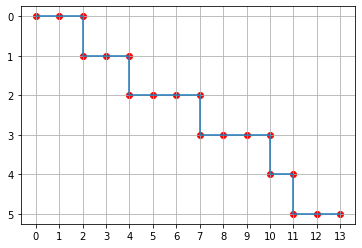

In [40]:
dij = Dijkstra()
#mode = True for Game mode 1; = False for Game mode 2
prevloc, path, cost3 = dij.shortpath(grid, True)
print("\n DIJKSTRA's ALGORITHM\n\n\nMODE 1\n\nPath Taken -> ", path)
print("\nThe cost to reach goal is -> ", cost3)
print("\nVisualizing Path \n")
plot_path(path)
#print(prevloc)


 DIJKSTRA's ALGORITHM


MODE 2

Path Taken ->  [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (4, 12), (5, 12), (5, 13)]

The cost to reach goal is ->  38.0

Visualizing Path 



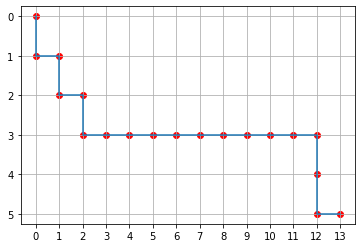

In [41]:
prevloc, path, cost4 = dij.shortpath(grid, False)
print("\n DIJKSTRA's ALGORITHM\n\n\nMODE 2\n\nPath Taken -> ", path)
print("\nThe cost to reach goal is -> ", cost4)
print("\nVisualizing Path \n")
plot_path(path)


In [42]:
# Storing results in dataframe for analysis and visualizing 

row = {'Case':"Random Nos",'Heuristic M1': cost1, 'Heuristic M2': cost2,'Dijkstra M1': cost3, 'Dijkstra M2': cost4}


results = results.append(row,ignore_index = True)



In [43]:
grid = gengrid.makegrid(2,0,0)

print("Number of Rows -> ",len(grid))
print("Number of Columns -> ",len(grid[0]))

print("Generating random grid using Uniform Distribution\n\n")#,grid)

#Visualizing Grid
print("\nVisualizing Grid\n")
gengrid.printgrid(grid)

Number of Rows ->  6
Number of Columns ->  14
Generating random grid using Uniform Distribution



Visualizing Grid

 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  5.5	|  6.3	|  12.0	|  12.2	|  12.5	|  4.8	|  3.1	|  9.8	|  4.4	|  8.6	|  6.2	|  3.6	|  5.3	|  5.8	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  5.2	|  12.2	|  11.9	|  4.2	|  3.5	|  8.4	|  10.3	|  5.1	|  8.0	|  10.7	|  5.9	|  3.5	|  8.0	|  3.9	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  3.3	|  6.1	|  7.8	|  6.3	|  5.8	|  7.1	|  7.4	|  9.6	|  9.5	|  7.8	|  5.4	|  6.6	|  12.9	|  9.3	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  8.9	|  6.0	|  8.6	|  6.8	|  7.3	|  10.2	|  9.9	|  4.3	|  9.1	|  9.3	|  10.5	|  8.4	|  7.8	|  12.7	|
 _______ _______ ___



HEURSISTIC APPROACH 


MODE 1
Path taken ->  [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  120.9
Visualizing Path taken 


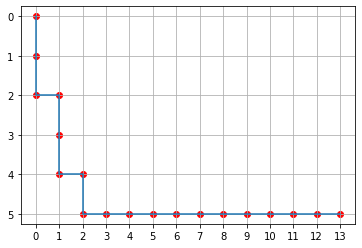


HEURISTIC APPROACH


MODE 2
Path taken ->  [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  41.3
Visualizing Path taken 


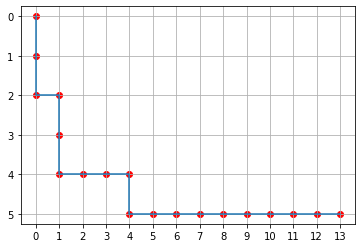

In [44]:
#Heuristic Mode1
path, cost1 = nav.simpleappr(grid,True)

print("\n\nHEURSISTIC APPROACH \n\n\nMODE 1\nPath taken -> ",path)
print("\nThe cost to reach goal is -> ",cost1)
print("Visualizing Path taken ")
plot_path(path)

#Heuristic Mode2

path, cost2 = nav.simpleappr(grid,False)

print("\nHEURISTIC APPROACH\n\n\nMODE 2\nPath taken -> ",path)
print("\nThe cost to reach goal is -> ",cost2)
print("Visualizing Path taken ")
plot_path(path)


 DIJKSTRA's ALGORITHM


MODE 1

Path Taken ->  [(0, 0), (1, 0), (2, 0), (2, 1), (3, 1), (4, 1), (4, 2), (4, 3), (4, 4), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  118.0

Visualizing Path 



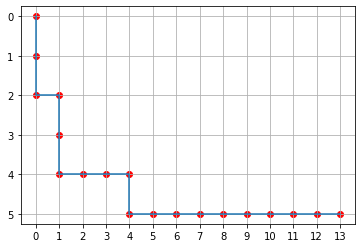


 DIJKSTRA's ALGORITHM


MODE 2

Path Taken ->  [(0, 0), (1, 0), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (4, 12), (4, 13), (5, 13)]

The cost to reach goal is ->  19.900000000000002

Visualizing Path 



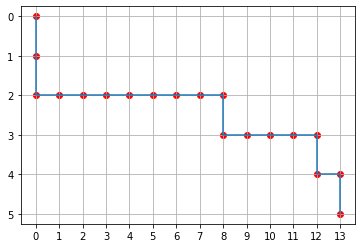

In [45]:
#mode = True for Game mode 1; = False for Game mode 2
prevloc, path3, cost = dij.shortpath(grid, True)
print("\n DIJKSTRA's ALGORITHM\n\n\nMODE 1\n\nPath Taken -> ", path)
print("\nThe cost to reach goal is -> ", cost3)
print("\nVisualizing Path \n")
plot_path(path)
#print(prevloc)

prevloc, path, cost4 = dij.shortpath(grid, False)
print("\n DIJKSTRA's ALGORITHM\n\n\nMODE 2\n\nPath Taken -> ", path)
print("\nThe cost to reach goal is -> ", cost4)
print("\nVisualizing Path \n")
plot_path(path)


In [46]:
row = {'Case':"Uniform Distribution",'Heuristic M1': cost1, 'Heuristic M2': cost2,'Dijkstra M1': cost3, 'Dijkstra M2': cost4}


results = results.append(row,ignore_index = True)


In [47]:
grid = gengrid.makegrid(3,0,0)

print("Number of Rows -> ",len(grid))
print("Number of Columns -> ",len(grid[0]))

print("Generating random grid using Poisson Distribution\n\n")#,grid)

#Visualizing Grid
print("\nVisualizing Grid\n")
gengrid.printgrid(grid)


Number of Rows ->  6
Number of Columns ->  14
Generating random grid using Poisson Distribution



Visualizing Grid

 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  9	|  10	|  8	|  14	|  13	|  5	|  9	|  7	|  12	|  9	|  15	|  6	|  10	|  10	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  11	|  14	|  12	|  13	|  10	|  11	|  14	|  7	|  13	|  12	|  22	|  11	|  9	|  12	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  11	|  7	|  11	|  12	|  21	|  13	|  10	|  11	|  21	|  9	|  13	|  9	|  8	|  11	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  12	|  15	|  12	|  8	|  4	|  8	|  14	|  19	|  15	|  7	|  15	|  12	|  10	|  12	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______



HEURSISTIC APPROACH 


MODE 1
Path taken ->  [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (2, 3), (3, 3), (3, 4), (3, 5), (4, 5), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  191
Visualizing Path taken 


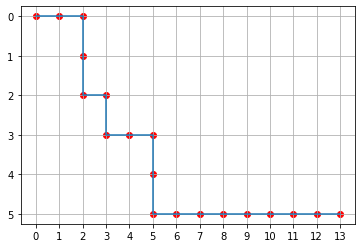


HEURISTIC APPROACH


MODE 2
Path taken ->  [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  42
Visualizing Path taken 


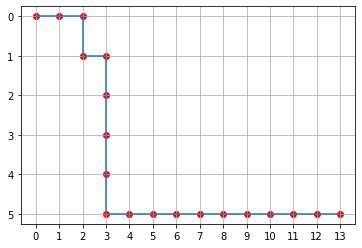

In [48]:
#Heuristic Mode1

path, cost1 = nav.simpleappr(grid,True)

print("\n\nHEURSISTIC APPROACH \n\n\nMODE 1\nPath taken -> ",path)
print("\nThe cost to reach goal is -> ",cost1)
print("Visualizing Path taken ")
plot_path(path)

#Heuristic Mode2

path, cost2 = nav.simpleappr(grid,False)

print("\nHEURISTIC APPROACH\n\n\nMODE 2\nPath taken -> ",path)
print("\nThe cost to reach goal is -> ",cost2)
print("Visualizing Path taken ")
plot_path(path)


 DIJKSTRA's ALGORITHM


MODE 1

Path Taken ->  [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (1, 12), (2, 12), (3, 12), (4, 12), (4, 13), (5, 13)]

The cost to reach goal is ->  177.0

Visualizing Path 



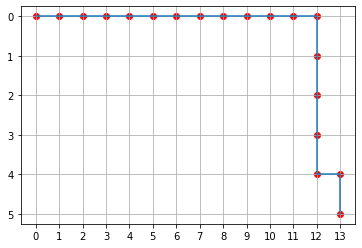


 DIJKSTRA's ALGORITHM


MODE 2

Path Taken ->  [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  40.0

Visualizing Path 



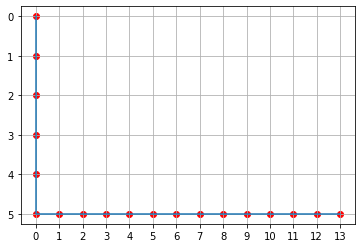

In [49]:
#mode = True for Game mode 1; = False for Game mode 2
prevloc, path, cost3 = dij.shortpath(grid, True)
print("\n DIJKSTRA's ALGORITHM\n\n\nMODE 1\n\nPath Taken -> ", path)
print("\nThe cost to reach goal is -> ", cost3)
print("\nVisualizing Path \n")
plot_path(path)
#print(prevloc)

prevloc, path, cost4 = dij.shortpath(grid, False)
print("\n DIJKSTRA's ALGORITHM\n\n\nMODE 2\n\nPath Taken -> ", path)
print("\nThe cost to reach goal is -> ", cost4)
print("\nVisualizing Path \n")
plot_path(path)


In [50]:
row = {'Case':"Poisson Distribution",'Heuristic M1': cost1, 'Heuristic M2': cost2,'Dijkstra M1': cost3, 'Dijkstra M2': cost4}


results = results.append(row,ignore_index = True)


In [51]:
grid = gengrid.makegrid(4,0,0)

print("Number of Rows -> ",len(grid))
print("Number of Columns -> ",len(grid[0]))

print("Generating random grid using Binomial Distribution\n\n")#,grid)

#Visualizing Grid
print("\nVisualizing Grid\n")
gengrid.printgrid(grid)

Number of Rows ->  6
Number of Columns ->  14
Generating random grid using Binomial Distribution



Visualizing Grid

 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  4	|  2	|  2	|  4	|  3	|  3	|  3	|  1	|  4	|  2	|  1	|  3	|  5	|  3	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  3	|  3	|  3	|  2	|  0	|  2	|  5	|  1	|  2	|  1	|  1	|  1	|  1	|  0	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  4	|  1	|  3	|  5	|  2	|  2	|  1	|  2	|  2	|  1	|  3	|  5	|  1	|  5	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  1	|  1	|  2	|  5	|  2	|  1	|  5	|  3	|  4	|  1	|  4	|  3	|  2	|  3	|
 _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______ _______
|  2	|  4	|  2	|  3	|  4	|  1



HEURSISTIC APPROACH 


MODE 1
Path taken ->  [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 5), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (3, 9), (4, 9), (4, 10), (5, 10), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  35
Visualizing Path taken 


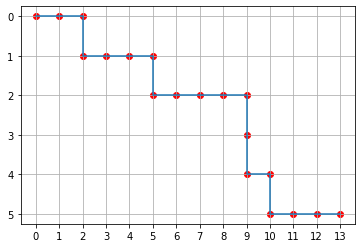


HEURISTIC APPROACH


MODE 2
Path taken ->  [(0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13)]

The cost to reach goal is ->  20
Visualizing Path taken 


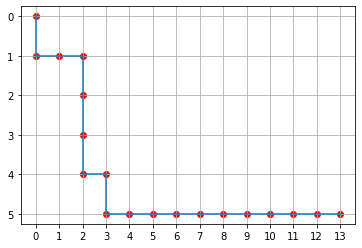

In [52]:
#Heuristic Mode1

path, cost1 = nav.simpleappr(grid,True)

print("\n\nHEURSISTIC APPROACH \n\n\nMODE 1\nPath taken -> ",path)
print("\nThe cost to reach goal is -> ",cost1)
print("Visualizing Path taken ")
plot_path(path)

#Heuristic Mode2

path, cost2 = nav.simpleappr(grid,False)

print("\nHEURISTIC APPROACH\n\n\nMODE 2\nPath taken -> ",path)
print("\nThe cost to reach goal is -> ",cost2)
print("Visualizing Path taken ")
plot_path(path)


 DIJKSTRA's ALGORITHM


MODE 1

Path Taken ->  [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 12), (3, 12), (4, 12), (5, 12), (5, 13)]

The cost to reach goal is ->  34.0

Visualizing Path 



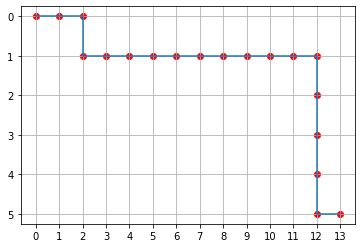


 DIJKSTRA's ALGORITHM


MODE 2

Path Taken ->  [(0, 0), (1, 0), (1, 1), (1, 2), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (2, 12), (3, 12), (4, 12), (5, 12), (5, 13)]

The cost to reach goal is ->  12.0

Visualizing Path 



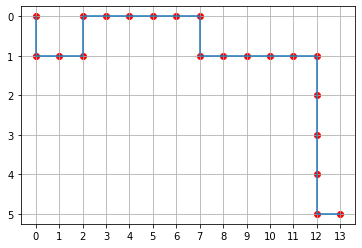

In [53]:
#mode = True for Game mode 1; = False for Game mode 2
prevloc, path, cost3 = dij.shortpath(grid, True)
print("\n DIJKSTRA's ALGORITHM\n\n\nMODE 1\n\nPath Taken -> ", path)
print("\nThe cost to reach goal is -> ", cost3)
print("\nVisualizing Path \n")
plot_path(path)
#print(prevloc)

prevloc, path, cost4 = dij.shortpath(grid, False)
print("\n DIJKSTRA's ALGORITHM\n\n\nMODE 2\n\nPath Taken -> ", path)
print("\nThe cost to reach goal is -> ", cost4)
print("\nVisualizing Path \n")
plot_path(path)


In [54]:
row = {'Case':"Binomial Distribution",'Heuristic M1': cost1, 'Heuristic M2': cost2,'Dijkstra M1': cost3, 'Dijkstra M2': cost4}


results = results.append(row,ignore_index = True)


In [55]:
print(results)

                    Case Heuristic M1 Heuristic M2  Dijkstra M1  Dijkstra M2
0             Random Nos          145           56        118.0         38.0
1   Uniform Distribution        120.9         41.3        118.0         19.9
2   Poisson Distribution          191           42        177.0         40.0
3  Binomial Distribution           35           20         34.0         12.0


In [56]:
# checking performance for size of the grid
x = 10
y = 10

for i in range (0,20):

  #print("X ", x," & Y ",y)
  grid = gengrid.makegrid(9,x,y)

  print("Number of Rows -> ",len(grid))
  print("Number of Columns -> ",len(grid[0]))


  path, cost1 = nav.simpleappr(grid,True)

  print("\n\nHEURSISTIC APPROACH \n\n\nMODE 1")#\nPath taken -> ",path)
  print("\nThe cost to reach goal is -> ",cost1)


  #Heuristic Mode2

  path, cost2 = nav.simpleappr(grid,False)

  print("\nHEURISTIC APPROACH\n\n\nMODE 2")#\nPath taken -> ",path)
  print("\nThe cost to reach goal is -> ",cost2)


  #mode = True for Game mode 1; = False for Game mode 2
  prevloc, path, cost3 = dij.shortpath(grid, True)
  print("\n DIJKSTRA's ALGORITHM\n\n\nMODE 1")#\n\nPath Taken -> ", path)
  print("\nThe cost to reach goal is -> ", cost3)
  #print("\nVisualizing Path \n")
  #plot_path(path)
  #print(prevloc)

  prevloc, path, cost4 = dij.shortpath(grid, False)
  print("\n DIJKSTRA's ALGORITHM\n\n\nMODE 2")#\n\nPath Taken -> ", path)
  print("\nThe cost to reach goal is -> ", cost4)
  #print("\nVisualizing Path \n")
  #plot_path(path)

  row = {'Case':"{} X {} ".format(x,y),'Heuristic M1': cost1, 'Heuristic M2': cost2,'Dijkstra M1': cost3, 'Dijkstra M2': cost4}

  results = results.append(row,ignore_index = True)

  x += 1
  y += 1




Number of Rows ->  10
Number of Columns ->  10


HEURSISTIC APPROACH 


MODE 1

The cost to reach goal is ->  135

HEURISTIC APPROACH


MODE 2

The cost to reach goal is ->  69

 DIJKSTRA's ALGORITHM


MODE 1

The cost to reach goal is ->  122.0

 DIJKSTRA's ALGORITHM


MODE 2

The cost to reach goal is ->  31.0
Number of Rows ->  11
Number of Columns ->  11


HEURSISTIC APPROACH 


MODE 1

The cost to reach goal is ->  138

HEURISTIC APPROACH


MODE 2

The cost to reach goal is ->  41

 DIJKSTRA's ALGORITHM


MODE 1

The cost to reach goal is ->  115.0

 DIJKSTRA's ALGORITHM


MODE 2

The cost to reach goal is ->  41.0
Number of Rows ->  12
Number of Columns ->  12


HEURSISTIC APPROACH 


MODE 1

The cost to reach goal is ->  138

HEURISTIC APPROACH


MODE 2

The cost to reach goal is ->  55

 DIJKSTRA's ALGORITHM


MODE 1

The cost to reach goal is ->  134.0

 DIJKSTRA's ALGORITHM


MODE 2

The cost to reach goal is ->  41.0
Number of Rows ->  13
Number of Columns ->  13


HEURSISTI

In [57]:
results1 = results[0:4]
print(results1)

                    Case Heuristic M1 Heuristic M2  Dijkstra M1  Dijkstra M2
0             Random Nos          145           56        118.0         38.0
1   Uniform Distribution        120.9         41.3        118.0         19.9
2   Poisson Distribution          191           42        177.0         40.0
3  Binomial Distribution           35           20         34.0         12.0


In [58]:
results2 = results[4:]
print(results2)

        Case Heuristic M1 Heuristic M2  Dijkstra M1  Dijkstra M2
4   10 X 10           135           69        122.0         31.0
5   11 X 11           138           41        115.0         41.0
6   12 X 12           138           55        134.0         41.0
7   13 X 13           118           81        113.0         41.0
8   14 X 14           155           64        144.0         64.0
9   15 X 15           186           92        164.0         64.0
10  16 X 16           156           99        150.0         57.0
11  17 X 17           199          102        178.0         64.0
12  18 X 18           238           72        214.0         68.0
13  19 X 19           224           97        207.0         69.0
14  20 X 20           228          119        207.0         81.0
15  21 X 21           241          125        227.0         73.0
16  22 X 22           285           97        250.0         73.0
17  23 X 23           290          122        237.0         68.0
18  24 X 24           323

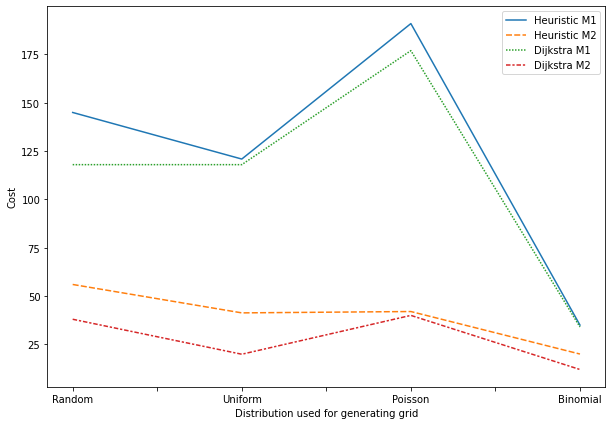

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

label = [" ","Random"," ","Uniform"," ","Poisson"," ","Binomial"]
plt.figure(figsize = (10,7))
fig = sns.lineplot(data=results1)
fig.set_xticklabels(labels = label)
fig.set_ylabel(ylabel = "Cost")
fig.set_xlabel(xlabel = "Distribution used for generating grid")
plt.show(fig)

In [60]:
#Comparing performance in Mode1
m1 = pd.DataFrame(results1[["Case", "Heuristic M1", "Dijkstra M1"]])
print(m1)

                    Case Heuristic M1  Dijkstra M1
0             Random Nos          145        118.0
1   Uniform Distribution        120.9        118.0
2   Poisson Distribution          191        177.0
3  Binomial Distribution           35         34.0


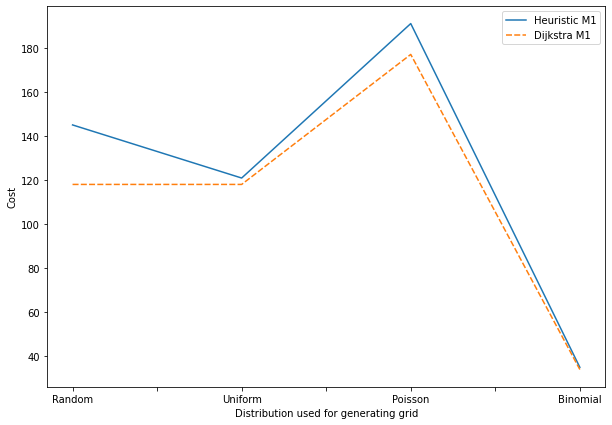

In [61]:

plt.figure(figsize = (10,7))
fig = sns.lineplot(data=m1)
fig.set_xticklabels(labels = label)
fig.set_ylabel(ylabel = "Cost")
fig.set_xlabel(xlabel = "Distribution used for generating grid")
plt.show(fig)

In [62]:
#Comparing performance in Mode2
m2 = pd.DataFrame(results1[["Case", "Heuristic M2", "Dijkstra M2"]])
print(m2)

                    Case Heuristic M2  Dijkstra M2
0             Random Nos           56         38.0
1   Uniform Distribution         41.3         19.9
2   Poisson Distribution           42         40.0
3  Binomial Distribution           20         12.0


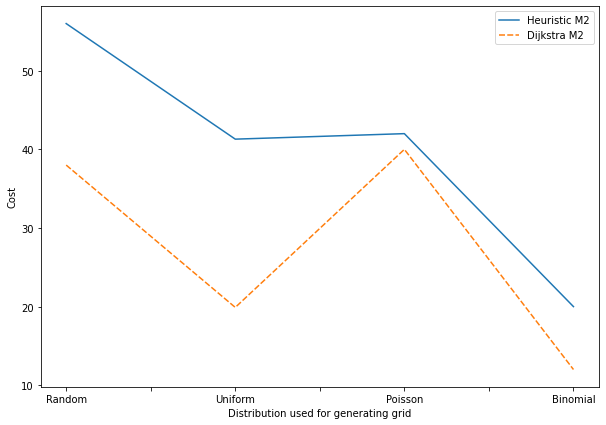

In [63]:

plt.figure(figsize = (10,7))
fig = sns.lineplot(data=m2)
fig.set_xticklabels(labels = label)
fig.set_ylabel(ylabel = "Cost")
fig.set_xlabel(xlabel = "Distribution used for generating grid")
plt.show(fig)

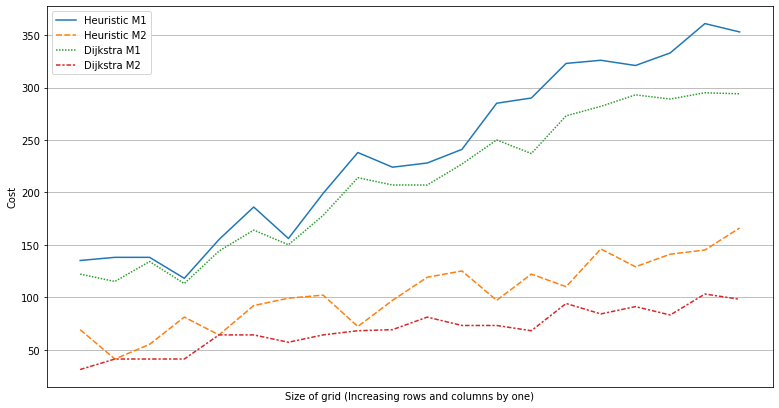

In [64]:

plt.figure(figsize = (13,7))
fig = sns.lineplot(data=results2)
fig.axes.get_xaxis().set_ticks([])

fig.set_ylabel(ylabel = "Cost")
fig.set_xlabel(xlabel = "Size of grid (Increasing rows and columns by one)")
plt.grid()
plt.show(fig)
